In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = os.path.join('..','Datasets','mnist_version_corta.csv')

with open(file_path) as f:
    data = list(csv.reader(f))

In [3]:
# Número de filas
print(len(data))

# Número de columnas
print(len(data[0]) if len(data) > 0 else 0)

# Primeras 5 filas
for i in range(5):
    print(data[i])

10000
785
['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [4]:
first_row = data[0]
first_label = int(first_row[0])

first_image = [int(pixel) for pixel in first_row[1:]]
first_image = np.array(first_image, dtype=np.uint8)

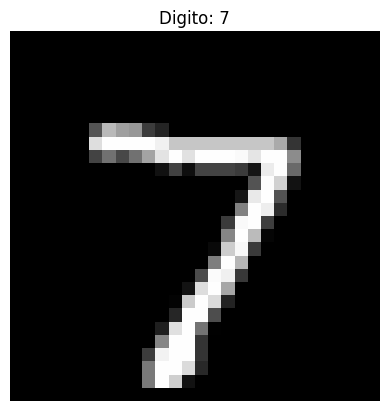

In [5]:
def show_digit(image_vector, label):
    image_matrix = image_vector.reshape(28, 28)
    plt.imshow(image_matrix, cmap="gray") # Grays para invertir colores
    plt.title(f"Digito: {label}")
    plt.axis("off")
    plt.show()

show_digit(first_image, first_label)


In [6]:
labels = []
pixels = []
for row in data:
    labels.append(int(row[0])) # número de la imagen
    pixels.append([int(p) for p in row[1:]]) # píxeles como números

labels_array = np.array(labels)
pixels_array = np.array(pixels)

pixel_mean = np.mean(pixels_array) # Media
pixel_std = np.std(pixels_array) # Desviación estándar

print(f'\n Media: {pixel_mean}\n Desviación estándar: {pixel_std}')


 Media: 33.791224489795916
 Desviación estándar: 79.17246322228644


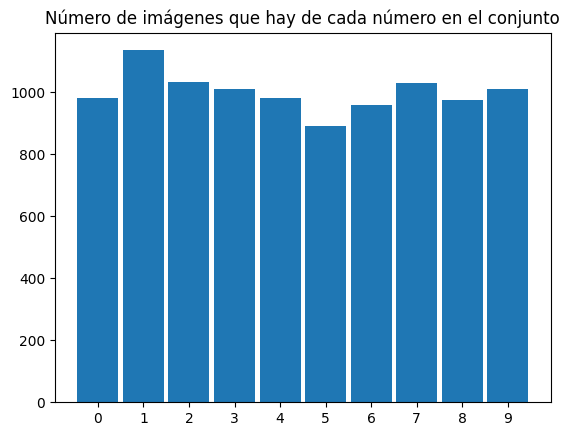

Número de imágenes del dígito 0: 980
Número de imágenes del dígito 1: 1135
Número de imágenes del dígito 2: 1032
Número de imágenes del dígito 3: 1010
Número de imágenes del dígito 4: 982
Número de imágenes del dígito 5: 892
Número de imágenes del dígito 6: 958
Número de imágenes del dígito 7: 1028
Número de imágenes del dígito 8: 974
Número de imágenes del dígito 9: 1009


In [7]:
labels_vect, counts_vect = np.unique(labels_array, return_counts=True)

plt.bar(labels_vect, counts_vect, align='center', width=0.9)
plt.gca().set_xticks(labels_vect)
plt.title('Número de imágenes que hay de cada número en el conjunto')
plt.show()

for (i,j) in zip(labels_vect, counts_vect):
    print(f'Número de imágenes del dígito {i}: {j}')

## Ejercicios de la Tarea 2

### Ejercicio 2.5

In [8]:
def caracter(pixel):
    rangos = {
        (0, 64): " ",
        (64, 128): ".",
        (128,192): "*",
        (192,256): "#"
    }
    for (a, b), ch in rangos.items():
        if a <= pixel < b:
            return ch
        
# Vectorizar la función para aplicarla a cada elemento del array        
vfunc = np.vectorize(caracter)

In [9]:
def convertidor(pos):
    """
    La función imprime en pantalla el dígito del dataset MNIST con los píxeles convertidos a caracteres.

    :param pos: Es cualquier entero k tal que 1 <= k <= 10000. Se refiere a uno de los 10000 dígitos contenidos en el dataset MNIST.
    :return: None
    """

    if pos < 1 or pos > 10000:
        raise Exception('El valor del parámetro está fuera de rango.')

    pix_arr = np.array(data[pos-1][1:], dtype=np.uint8)
    char_arr = vfunc(pix_arr)

    for j in range(28):
        res = ''
        for i in range(28):
            res += char_arr[j*28+i]
        print(res)

In [10]:
convertidor(130) 

                            
                            
                            
                            
                            
              .#      **    
             .##..*#####    
            #########*.     
           #####***.        
          ##*               
         *##                
         ##                 
        .##                 
         ###*               
         .#####.            
            *###*           
              *###*         
                ###         
                .##         
                ###         
              .###          
        .    *###.          
       .# .*###*            
       .######.             
        *##*.               
                            
                            
                            


### Ejercicio 2.6

In [11]:
def contar_pixeles_negros(conjunto, etiquetas, digito):
    """
    Cuenta cuántas veces aparece un dígito en el conjunto de datos y lo imprime en pantalla.
    Cuenta cuántas veces cada pixel es negro (>280) para el conjunto de imágenes del dígito indicado.

    :param conjunto: np.array de forma (N, 784) con las imágenes aplanadas
    :param etiquetas: np.array de forma (N,) con las etiquetas de los dígitos
    :param digito: int, dígito (0-9)
    :return: np.array de forma (784,) con los conteos de píxeles negros
    """
    
    ''' Arreglo booleano '''
    etiquetas_bool_array = (etiquetas == digito)
    # print(f'Dimensión de etiquetas_bool_array: {etiquetas_bool_array.shape}')

    ''' Filtramos `conjunto` por filas usando el arreglo booleano.
    Se seleccionan aquellas imágenes que corresponden con el dígito elegido. '''
    imagenes_array = conjunto[etiquetas_bool_array]
    # print(f'Dimensión de imagenes_array: {imagenes_array.shape}')
    print(f'\nHay {imagenes_array.shape[0]} imágenes del dígito {digito}')

    ''' Hacemos explícito que en la salida queremos un arreglo de dimensión (784,) '''
    conteos = np.zeros(784, dtype=int)

    ''' Contamos píxeles negros (valores > 128)
    Elegimos axis=0 (filas) pues queremos hacer los conteos sobre cada pixel de cada imagen. 
    (Un mismo índice de cada fila es un mismo pixel de cada imagen) '''
    conteos = np.sum(imagenes_array > 128, axis=0)
    # print(f'Dimensión de conteos: {conteos.shape}')

    return conteos


array_cero = contar_pixeles_negros(pixels_array, labels_array, 0)
array_uno = contar_pixeles_negros(pixels_array, labels_array, 1)


Hay 980 imágenes del dígito 0

Hay 1135 imágenes del dígito 1


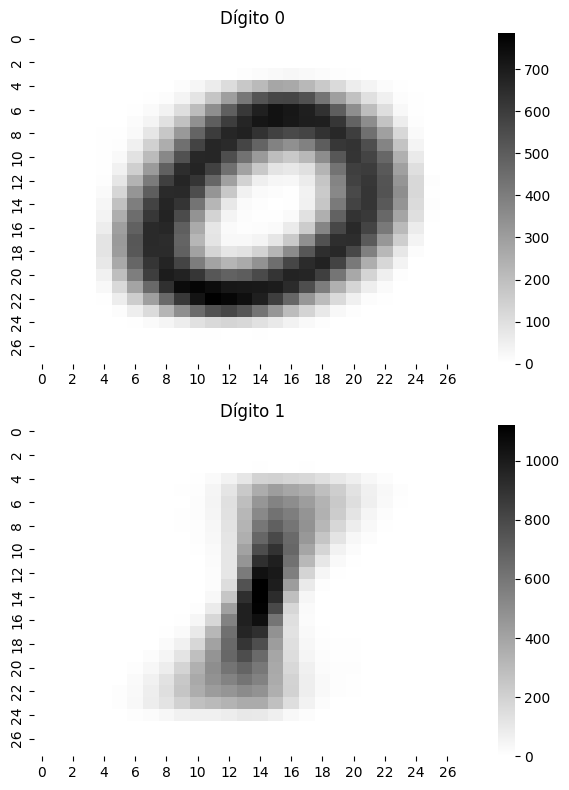

In [12]:
fig, ax = plt.subplots(2,1,
                       figsize=(6,8))

ax[0].set_title('Dígito 0')
ax[1].set_title('Dígito 1')

sns.heatmap(np.reshape(array_cero, (28,28)), cmap='binary', ax=ax[0])
sns.heatmap(np.reshape(array_uno, (28,28)), cmap='binary', ax=ax[1])
plt.tight_layout()
plt.show()

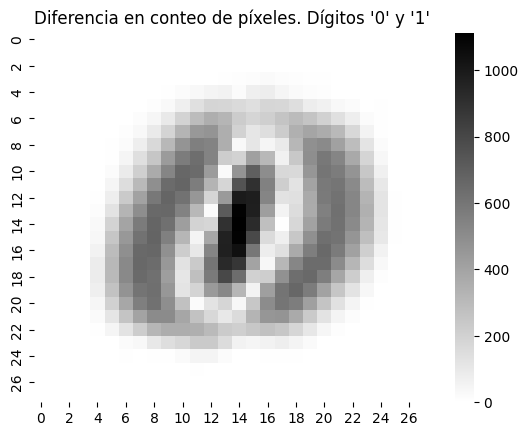

In [13]:
sns.heatmap(np.reshape(abs(array_cero-array_uno), (28,28)), cmap='binary')
plt.title("Diferencia en conteo de píxeles. Dígitos '0' y '1'")
plt.show()

En la representación visual anterior lo que se hizo fue obtener la diferencia en valor absoluto de los conteos de píxeles negros para los dígitos '0' y '1'.

Notamos dos cosas en la representación visual:
* Los píxeles con valores altos indican una gran diferencia en el número de píxeles negros para un dígito en su conjunto de imágenes respecto al otro.
* Los píxeles con valores bajos indican que hay similitud entre ambos dígitos, es decir, el número de píxeles negros para un dígito en su conjunto de imágenes es comparable con la del otro, o incluso igual.

Además,
* El dígito 0 tiende a ser un anillo con un centro claro.
* El dígito 1 tiende a ser una línea recta que puede presentar una pequeña inclinación respecto a la vertical pero que siempre cruza por el centro.

Así, el conjunto de píxeles que mejor separa a los dígitos '0' y '1' está ubicado en el centro del cero pues es ahí donde está más marcada la diferencia en el número de píxeles negros. Y si suponemos que existe un solo píxel con el valor más alto, este se encontraría en el centro de la cuadrícula.

Es importante destacar que para nuestro conjunto de datos lo anterior es cierto, ya que el número de imágenes para el dígito 0 es menor que para el dígito 1, lo que provoca que en los trazos laterales del dígito 0 no haya la misma cantidad en la diferencia entre píxeles negros como ocurre en el centro a pesar de que en dichas zonas no haya trazos del dígito 1. Si tuviéramos la misma cantidad de imágenes para ambos dígitos, entonces se podría observar que el conjunto de píxeles que mejor separa a los dígitos '0' y '1' se ubican en los trazos laterales del cero y en su centro, haciendo envidente que la zona de los trazos superior e inferior del dígito 0 es más clara pues es ahí por donde cruza el trazo del dígito 1. Bajo este supuesto también podríamos decir que si existiera un solo píxel con el valor más alto, este se encontraría en el centro de la cuadrícula debido a la consistencia en el trazo recto del dígito 1 en comparación con el trazo circular del dígito 0.